In [1]:
import torch 
from omegaconf import OmegaConf

In [2]:

from conditional_neural_processes.model import DeterministicCNP
from neural_processes.model import  DeterministicEncoder, LatentDecoder, Aggregator, LatentNP
from dataset import GPCurvesReader
from neural_processes.train import train

In [3]:
%reload_ext autoreload
%autoreload 2

# Neural Processes 
Latent distribution to model functional uncertainty: $z = \mathcal{N}(\mu(r), I\sigma(r))$

In [4]:
with open("config/np_config.yaml") as file:
        cfg = OmegaConf.load(file)

encoder_num_layers = cfg.encoder.num_layers
encoder_num_units = cfg.encoder.num_units
encoder_activation_cls = cfg.encoder.activation_cls
decoder_num_layers = cfg.decoder.num_layers
decoder_num_units = cfg.decoder.num_units
decoder_activation_cls = cfg.decoder.activation_cls
aggregator_num_layers = cfg.aggregator.num_layers
aggregator_num_units = cfg.aggregator.num_units
aggregator_activation_cls = cfg.aggregator.activation_cls
r_dim = cfg.r_dim
y_size = cfg.dataset.y_size
x_size = cfg.dataset.x_size
max_num_context = cfg.dataset.max_num_context
batch_size = cfg.dataset.batch_size

In [5]:
# 1d regression dataset, sampled from a GP
data_train = GPCurvesReader(batch_size=batch_size, max_num_context=max_num_context)
data_test = GPCurvesReader(batch_size=batch_size, max_num_context=max_num_context, testing=True)

In [6]:
latent_encoder = DeterministicEncoder(x_size=x_size, r_dim=r_dim, y_size=y_size, num_layers=encoder_num_layers, num_units=encoder_num_units, activation_cls=encoder_activation_cls)
latent_decoder = LatentDecoder(x_size=x_size, r_dim=r_dim, y_size=y_size, num_layers=decoder_num_layers, num_units=decoder_num_units, activation_cls=decoder_activation_cls)
aggregator = Aggregator(r_dim=r_dim, num_layers=aggregator_num_layers, num_units=aggregator_num_units, activation_cls=aggregator_activation_cls)

In [22]:
latent_np = LatentNP(encoder_num_layers=encoder_num_layers,
                 encoder_num_units=encoder_num_units,
                 encoder_activation_cls=encoder_activation_cls,
                 decoder_num_layers=decoder_num_layers, 
                 decoder_num_units=decoder_num_units,
                 decoder_activation_cls=decoder_activation_cls,
                 agggreagtor_num_layers=aggregator_num_layers,
                 agggreagtor_num_units=aggregator_num_units,
                 agggreagtor_activation_cls=aggregator_activation_cls,
                 r_dim=r_dim,
                 x_size=x_size,
                 y_size=y_size)
latent_np

LatentNP(
  (_encoder): DeterministicEncoder(
    (_activation): ReLU()
    (_linear): ModuleList(
      (0): Linear(in_features=2, out_features=128, bias=True)
      (1-4): 4 x Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (_aggregator): Aggregator(
    (_activation): ReLU()
    (_linear): ModuleList(
      (0-1): 2 x Linear(in_features=128, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=256, bias=True)
    )
  )
  (_decoder): LatentDecoder(
    (_activation): ReLU()
    (_linear): ModuleList(
      (0): Linear(in_features=129, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=2, bias=True)
    )
  )
)

Training for 200000 epochs:   0%|          | 0/200000 [00:00<?, ?it/s]

Training for 200000 epochs:   2%|▏         | 4994/200000 [00:25<18:51, 172.41it/s]

Loss: 7.837602138519287


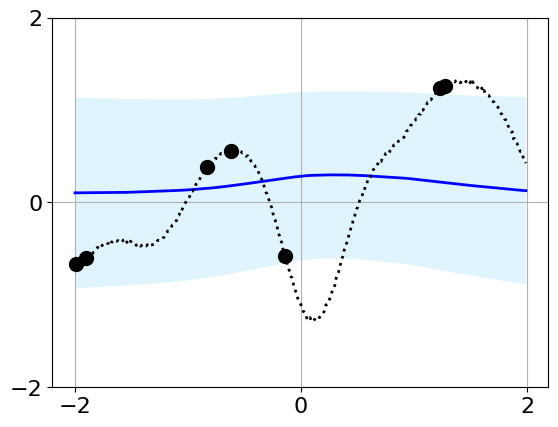

Training for 200000 epochs:   5%|▍         | 9997/200000 [00:54<16:48, 188.49it/s]

Loss: 18.257732391357422


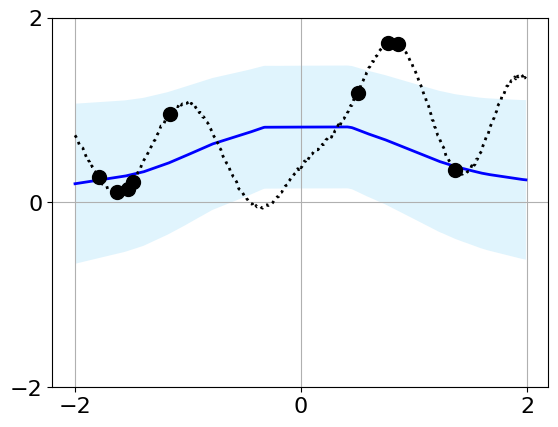

Training for 200000 epochs:   7%|▋         | 14999/200000 [01:23<16:47, 183.53it/s]

Loss: 14.778549194335938


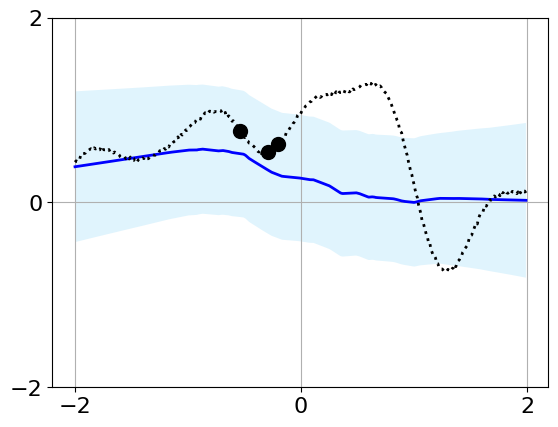

Training for 200000 epochs:  10%|▉         | 19996/200000 [01:51<15:38, 191.71it/s]

Loss: 18.67308807373047


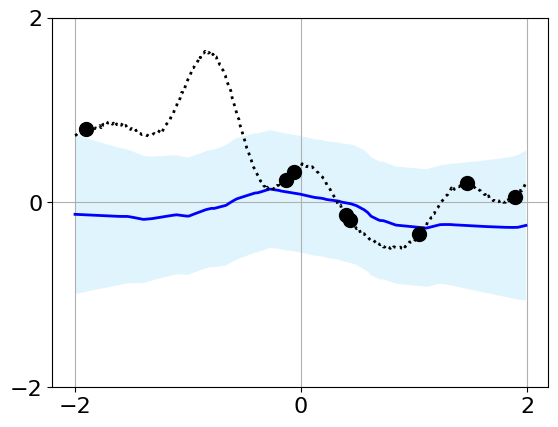

Training for 200000 epochs:  12%|█▏        | 24999/200000 [02:20<17:59, 162.12it/s]

Loss: 15.78367805480957


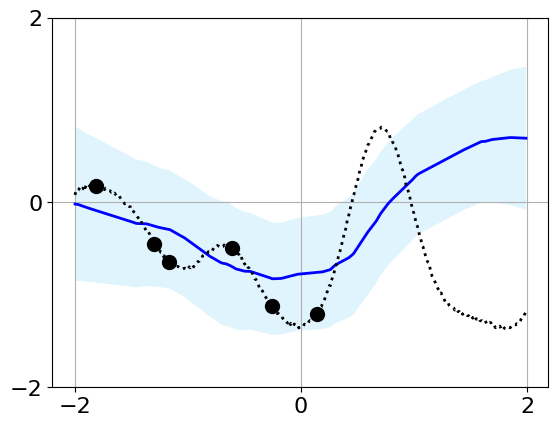

Training for 200000 epochs:  15%|█▍        | 29999/200000 [02:47<14:38, 193.43it/s]

Loss: 16.255029678344727


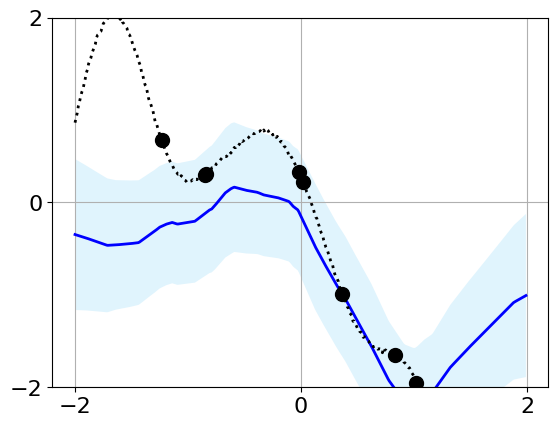

Training for 200000 epochs:  17%|█▋        | 34998/200000 [03:14<15:13, 180.66it/s]

Loss: 15.437013626098633


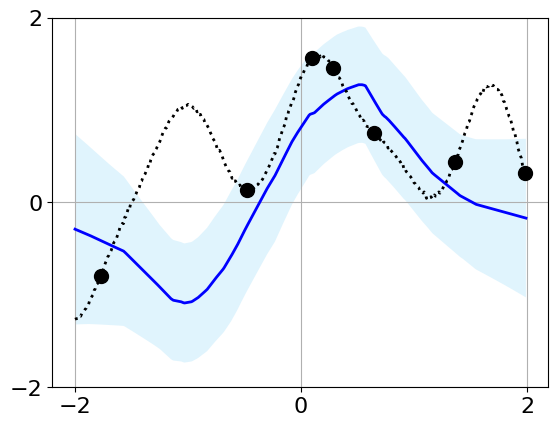

Training for 200000 epochs:  20%|█▉        | 39994/200000 [03:42<13:33, 196.72it/s]

Loss: 13.921530723571777


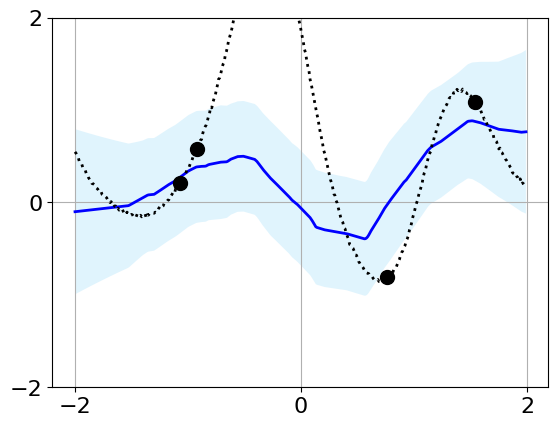

Training for 200000 epochs:  22%|██▏       | 44992/200000 [04:10<14:44, 175.34it/s]

Loss: 14.088119506835938


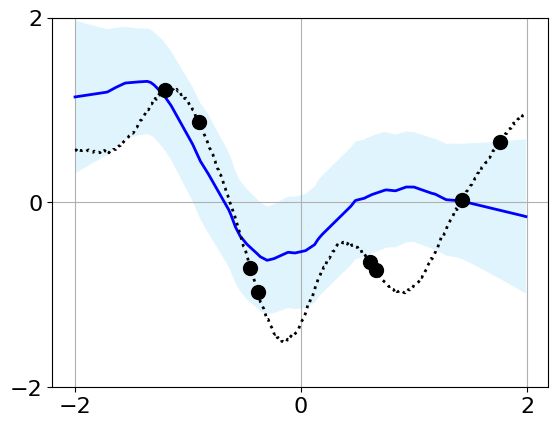

Training for 200000 epochs:  25%|██▍       | 49996/200000 [04:39<15:28, 161.51it/s]

Loss: 17.309463500976562


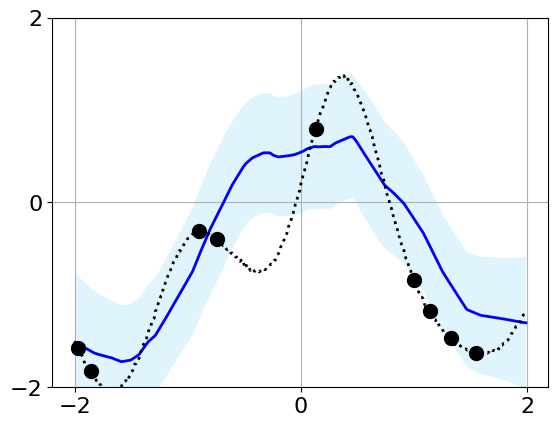

Training for 200000 epochs:  27%|██▋       | 54989/200000 [05:08<14:11, 170.28it/s]

Loss: 16.07912826538086


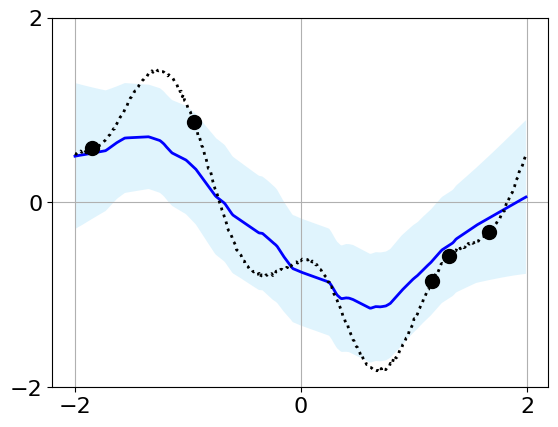

Training for 200000 epochs:  30%|██▉       | 59990/200000 [05:37<12:54, 180.71it/s]

Loss: 14.355242729187012


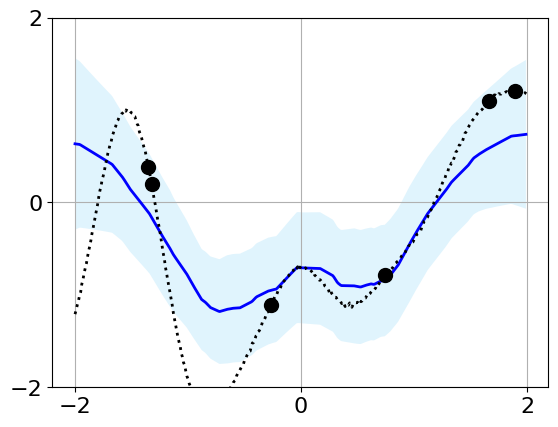

Training for 200000 epochs:  32%|███▏      | 64986/200000 [06:05<11:24, 197.25it/s]

Loss: 10.874238967895508


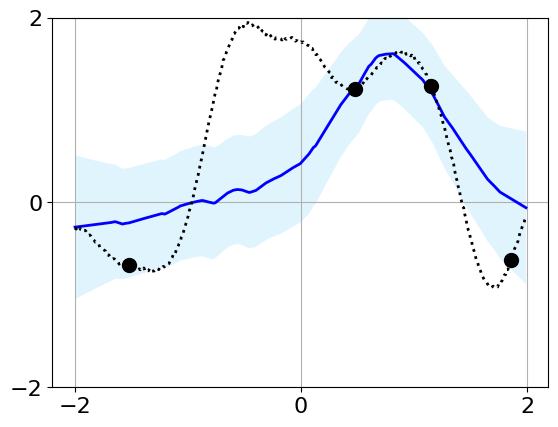

Training for 200000 epochs:  35%|███▍      | 69994/200000 [06:33<10:51, 199.43it/s]

Loss: 16.66653060913086


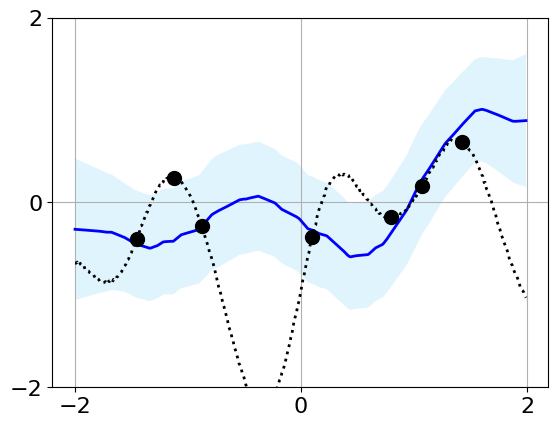

Training for 200000 epochs:  37%|███▋      | 74983/200000 [07:01<12:11, 170.88it/s]

Loss: 10.008821487426758


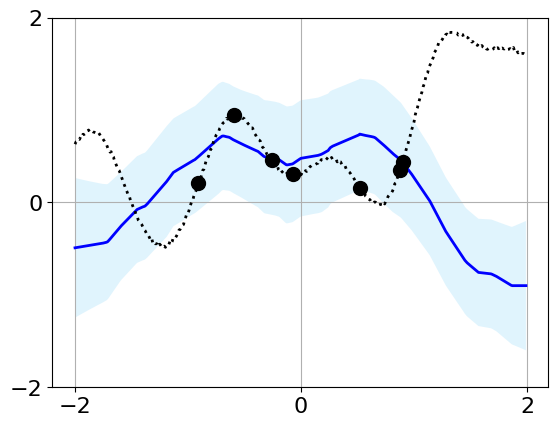

Training for 200000 epochs:  40%|███▉      | 79984/200000 [07:29<11:12, 178.48it/s]

Loss: 16.225631713867188


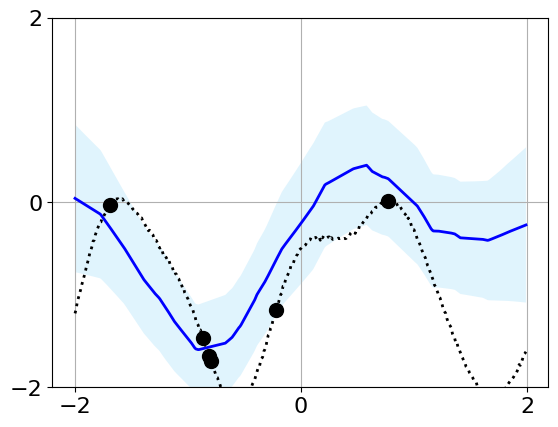

Training for 200000 epochs:  42%|████▏     | 84994/200000 [07:57<11:36, 165.09it/s]

Loss: 13.245444297790527


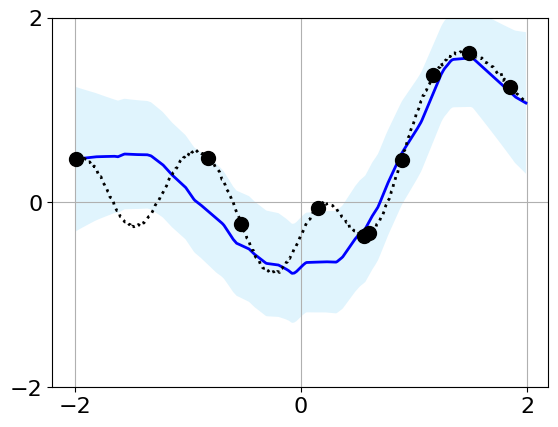

Training for 200000 epochs:  45%|████▍     | 89981/200000 [08:26<11:31, 159.22it/s]

Loss: 10.719217300415039


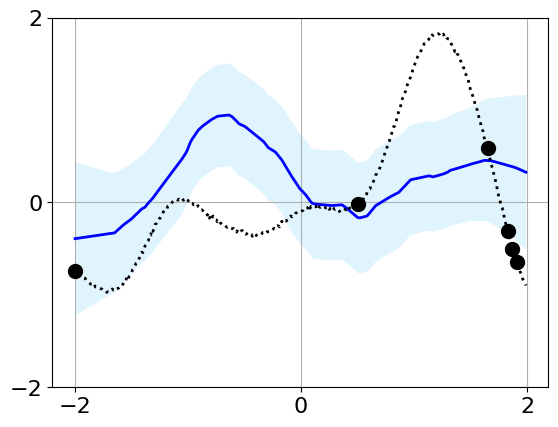

Training for 200000 epochs:  47%|████▋     | 94992/200000 [08:55<10:45, 162.72it/s]

Loss: 17.069761276245117


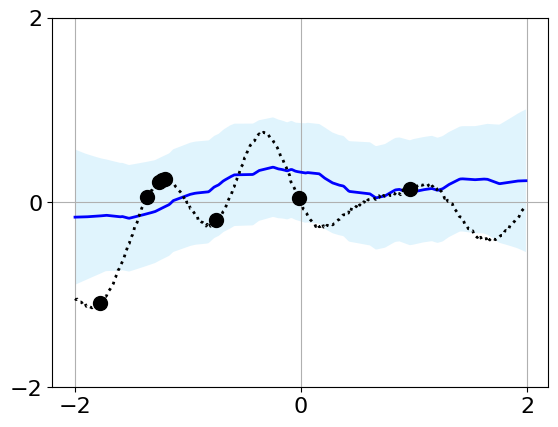

Training for 200000 epochs:  50%|████▉     | 99986/200000 [09:24<09:21, 177.96it/s]

Loss: 17.91373062133789


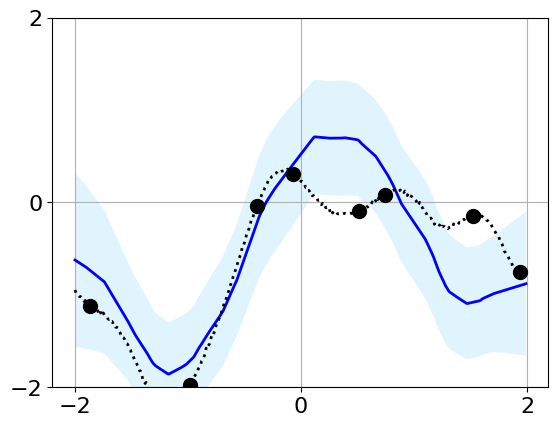

Training for 200000 epochs:  52%|█████▏    | 104995/200000 [09:53<08:29, 186.38it/s]

Loss: 12.927814483642578


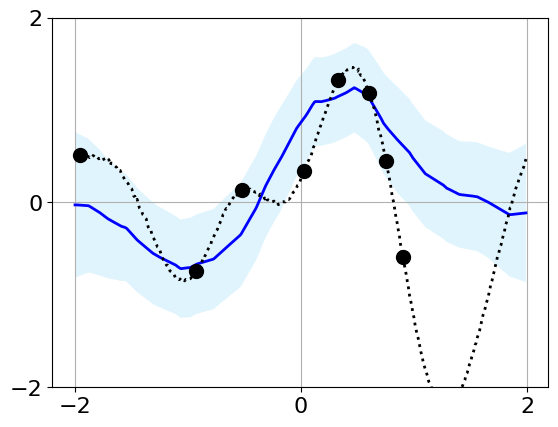

Training for 200000 epochs:  55%|█████▍    | 109988/200000 [10:22<08:17, 181.01it/s]

Loss: 9.047870635986328


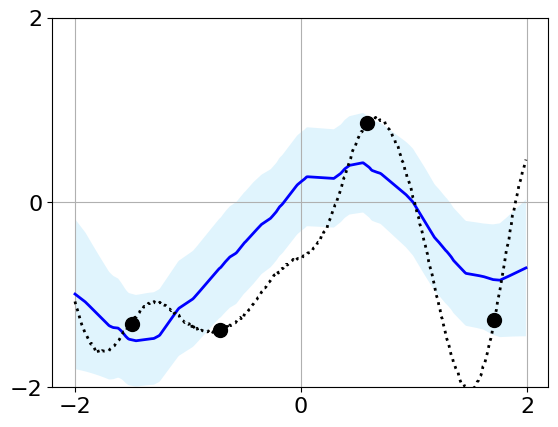

Training for 200000 epochs:  57%|█████▋    | 114981/200000 [10:51<07:38, 185.58it/s]

Loss: 11.474496841430664


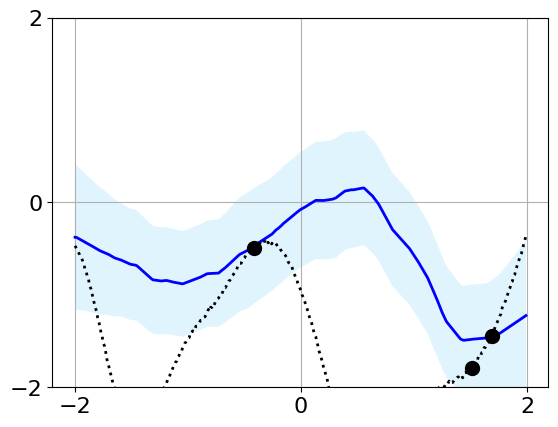

Training for 200000 epochs:  60%|█████▉    | 119997/200000 [11:20<09:22, 142.13it/s]

Loss: 15.359088897705078


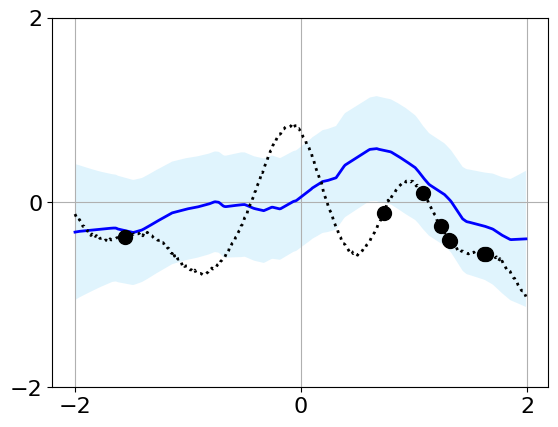

Training for 200000 epochs:  62%|██████▏   | 124998/200000 [11:48<06:58, 179.22it/s]

Loss: 18.62670135498047


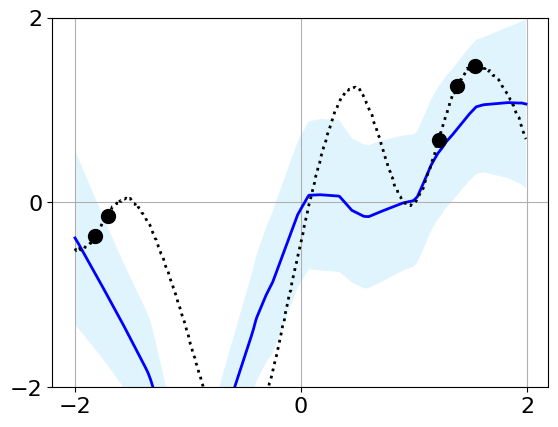

Training for 200000 epochs:  65%|██████▍   | 129985/200000 [12:16<06:16, 185.76it/s]

Loss: 6.870003700256348


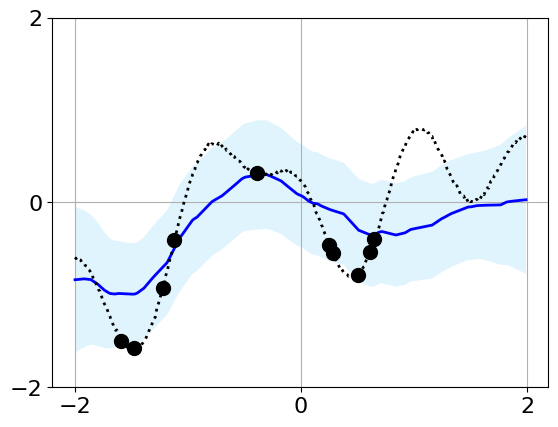

Training for 200000 epochs:  67%|██████▋   | 134981/200000 [12:43<06:02, 179.29it/s]

Loss: 8.302358627319336


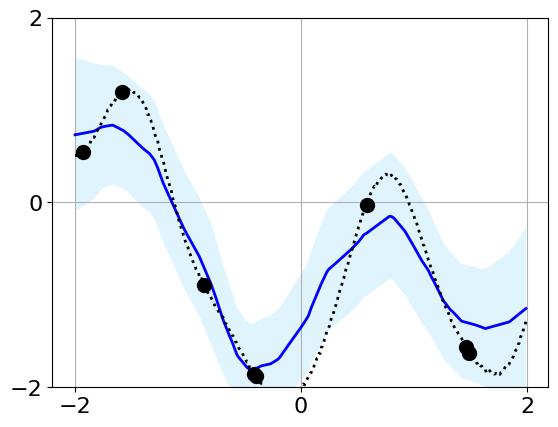

Training for 200000 epochs:  70%|██████▉   | 139996/200000 [13:12<05:16, 189.88it/s]

Loss: 12.601980209350586


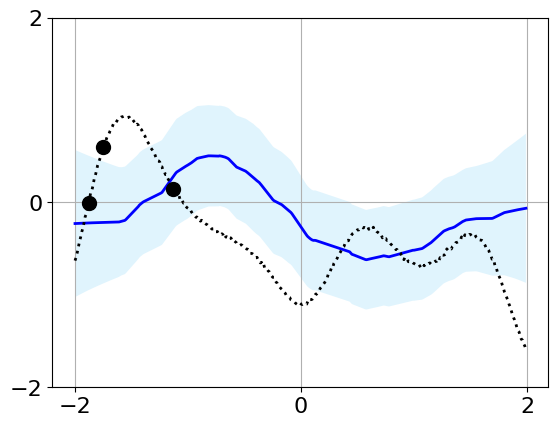

Training for 200000 epochs:  72%|███████▏  | 144986/200000 [13:39<04:32, 201.59it/s]

Loss: 11.5272798538208


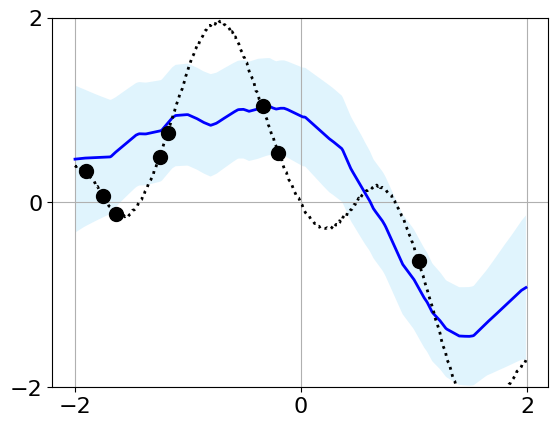

Training for 200000 epochs:  75%|███████▍  | 149986/200000 [14:08<04:36, 180.57it/s]

Loss: 7.17629337310791


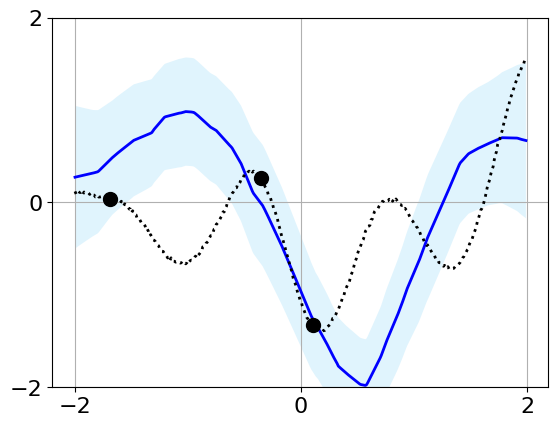

Training for 200000 epochs:  77%|███████▋  | 154997/200000 [14:36<04:09, 180.11it/s]

Loss: 13.450125694274902


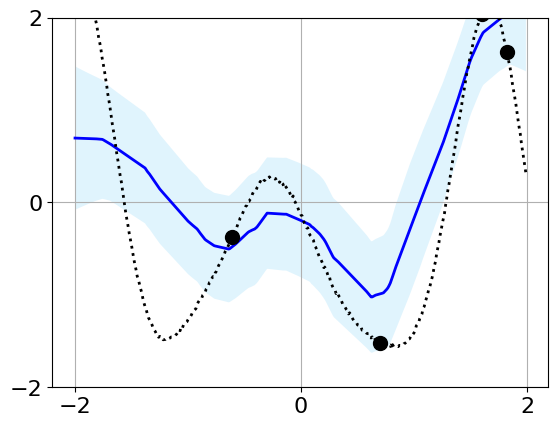

Training for 200000 epochs:  80%|███████▉  | 159997/200000 [15:05<03:47, 175.94it/s]

Loss: 11.692874908447266


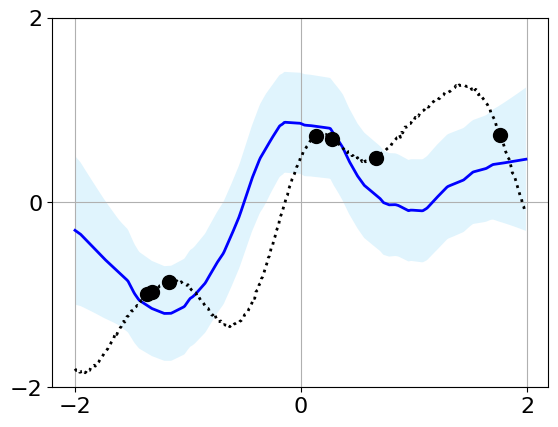

Training for 200000 epochs:  82%|████████▏ | 164979/200000 [15:34<03:33, 163.91it/s]

Loss: 8.208292961120605


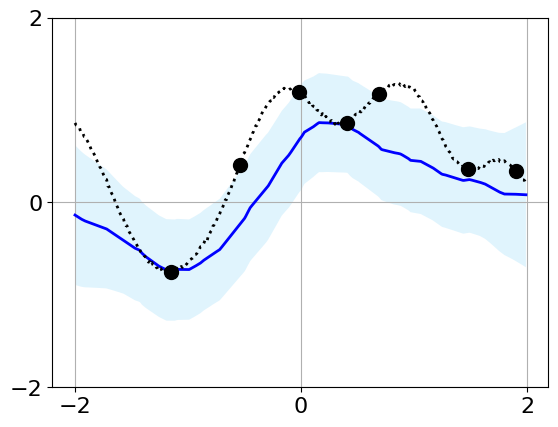

Training for 200000 epochs:  85%|████████▍ | 169983/200000 [16:03<02:42, 184.59it/s]

Loss: 15.715785026550293


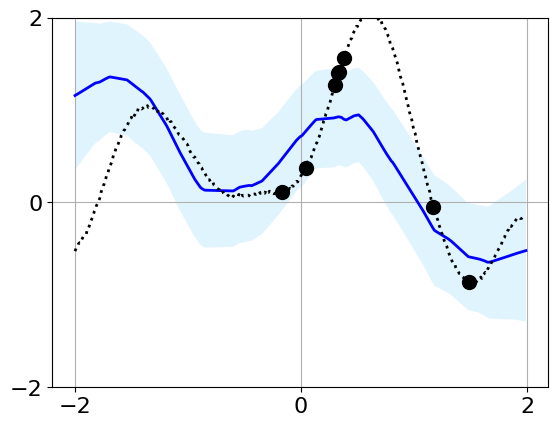

Training for 200000 epochs:  87%|████████▋ | 174998/200000 [16:32<02:24, 172.77it/s]

Loss: 16.122982025146484


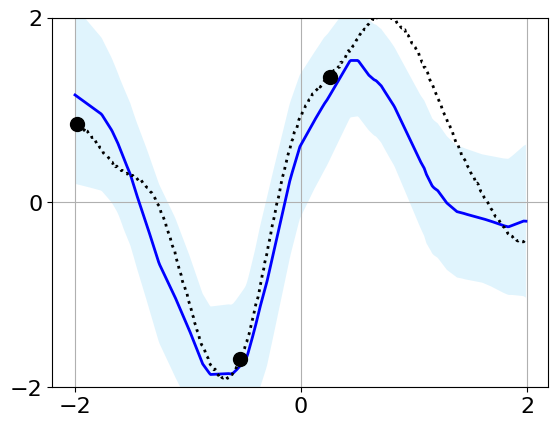

Training for 200000 epochs:  90%|████████▉ | 179994/200000 [17:01<01:43, 193.81it/s]

Loss: 15.645771026611328


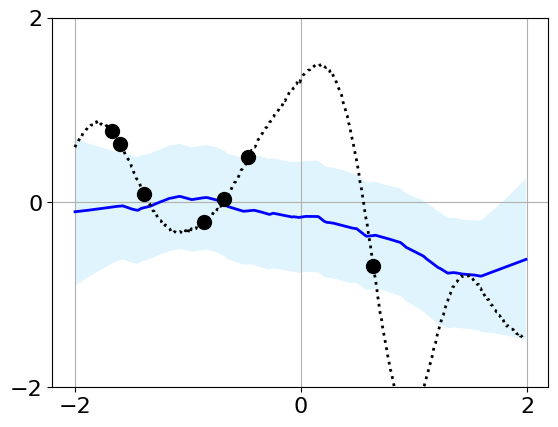

Training for 200000 epochs:  92%|█████████▏| 184993/200000 [17:30<01:17, 194.76it/s]

Loss: 7.199265003204346


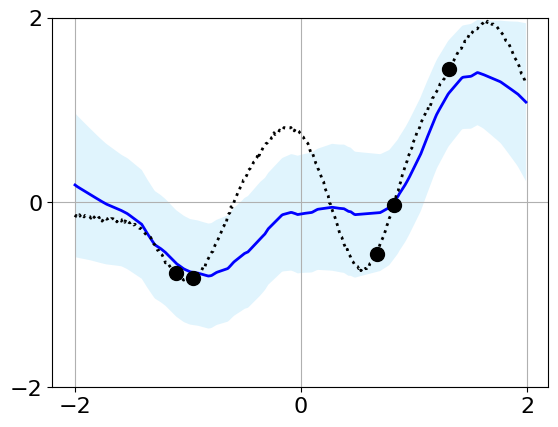

Training for 200000 epochs:  95%|█████████▍| 189986/200000 [17:55<00:51, 194.41it/s]

Loss: 18.291736602783203


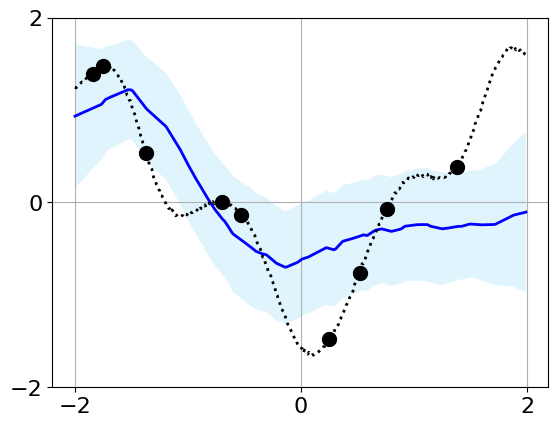

Training for 200000 epochs:  97%|█████████▋| 194991/200000 [18:19<00:22, 220.88it/s]

Loss: 18.795303344726562


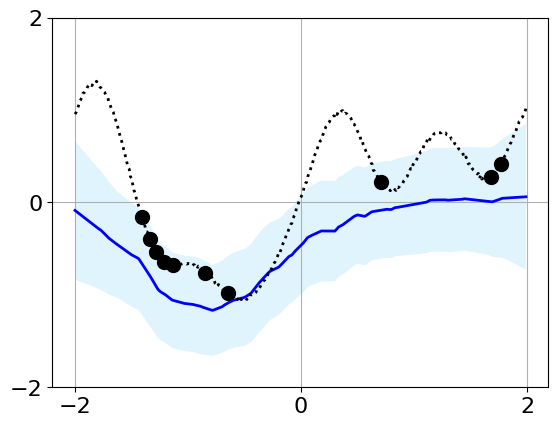

Training for 200000 epochs: 100%|█████████▉| 199988/200000 [18:44<00:00, 183.84it/s]

Loss: 17.188560485839844


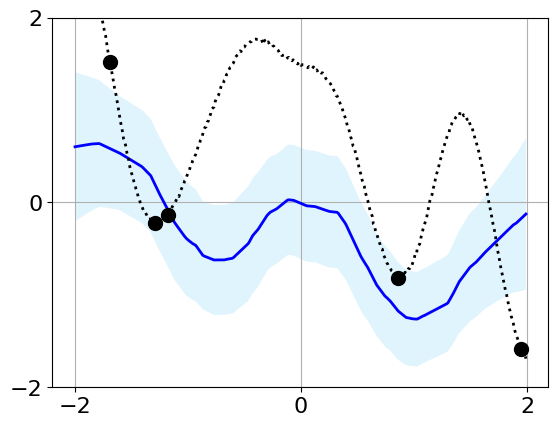

Training for 200000 epochs: 100%|██████████| 200000/200000 [18:44<00:00, 177.80it/s]


In [23]:
latent_np = train(config=cfg, model=latent_np, data_train=data_train, data_test=data_test)

In [24]:
torch.save(latent_np, 'neural_processes/trained_model/np_elbo.pt')

PicklingError: Can't pickle <class 'neural_processes.model.np.LatentNP'>: it's not the same object as neural_processes.model.np.LatentNP

# Conditional Neural Processes (CNP)
## Reference
[Conditional Neural Processes](https://arxiv.org/abs/1807.01613)

[The Neural Processes Family - GitHub](https://github.com/google-deepmind/neural-processes/tree/master)
## The CNP model 
- An **encoder** $h$ from input space into representation space that takes in *pairs* of $(x, y)$, context values and produces a representation $r_i = h((x, y)_i)$ for each of the pairs. $h$ is parameterised as a neural network. 
- An **aggregator** $a$ that summarises the encoded inputs. A single order-invariant global representation $r$ is obtained, and the simplest operation that ensures order-invariance and works well in practice is the mean function $r=a(r_i) = \frac{1}{n}\sum_{i=1}^n r_i$. 
- A **decoder** $g$ that takes as input the global representation $r$ as well as the new target locations $x_T$ and outputs embedding $\phi_T$ that parameterises the output distribution. 
    - For regression tasks, $\Phi_i$ parameterises the mean and variance $\phi_i(\mu_i, \sigma_i^2)$  of a Gaussian distribution $\mathcal{N}(\mu_i, \sigma_i^2)$ for every $x_i \in T$. 
   

In [ ]:
with open("config/cnp_config.yaml") as file:
        cfg = OmegaConf.load(file)

encoder_num_layers = cfg.encoder.num_layers
encoder_num_units = cfg.encoder.num_units
encoder_activation_cls = cfg.encoder.activation_cls
decoder_num_layers = cfg.decoder.num_layers
decoder_num_units = cfg.decoder.num_units
decoder_activation_cls = cfg.decoder.activation_cls
r_dim = cfg.r_dim
y_size = cfg.dataset.y_size
x_size = cfg.dataset.x_size
max_num_context = cfg.dataset.max_num_context
batch_size = cfg.dataset.batch_size

In [ ]:
deterministic_cnp = DeterministicCNP(encoder_num_layers=encoder_num_layers, encoder_num_units=encoder_num_units, encoder_activation_cls=encoder_activation_cls, 
                                     decoder_num_layers=decoder_num_layers, decoder_num_units=decoder_num_units, decoder_activation_cls=decoder_activation_cls,
                                     r_dim=r_dim, y_size=y_size, x_size=x_size)
deterministic_cnp

DeterministicCNP(
  (_encoder): DeterministicEncoder(
    (_activation): ReLU()
    (_linear): ModuleList(
      (0): Linear(in_features=2, out_features=128, bias=True)
      (1-4): 4 x Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (_decoder): DeterministicDecoder(
    (_activation): ReLU()
    (_linear): ModuleList(
      (0): Linear(in_features=129, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=128, bias=True)
      (2): Linear(in_features=128, out_features=2, bias=True)
    )
  )
)

Training for 200000 epochs:   2%|▏         | 4972/200000 [00:12<07:33, 430.02it/s]

Loss: 4.157233238220215


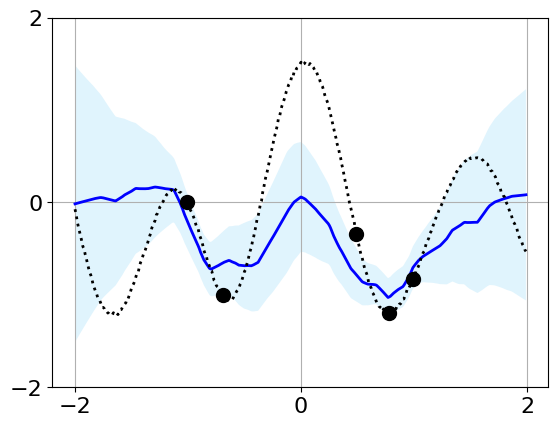

Training for 200000 epochs:   5%|▍         | 9981/200000 [00:27<08:37, 367.07it/s]

Loss: 1.7788071632385254


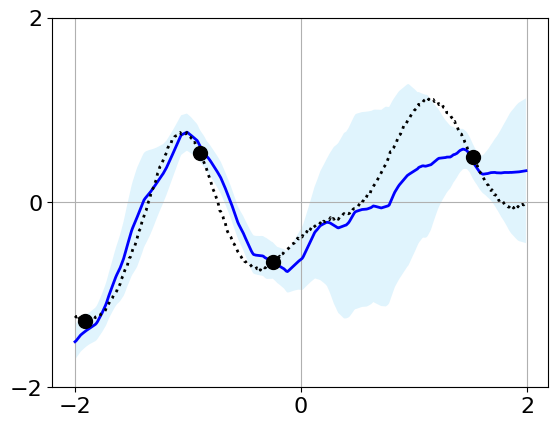

Training for 200000 epochs:   7%|▋         | 14986/200000 [00:41<08:12, 375.69it/s]

Loss: -1.2261189222335815


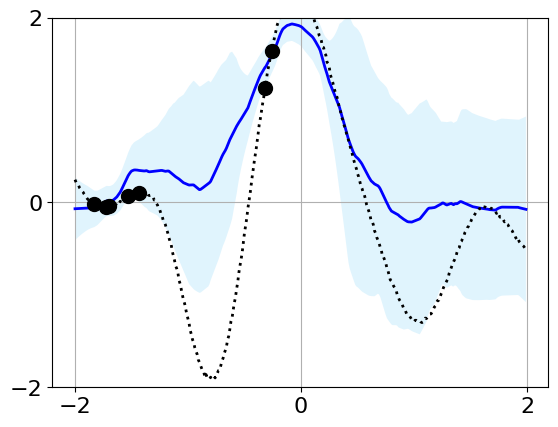

Training for 200000 epochs:  10%|▉         | 19993/200000 [00:55<08:03, 372.66it/s]

Loss: 1.0807685852050781


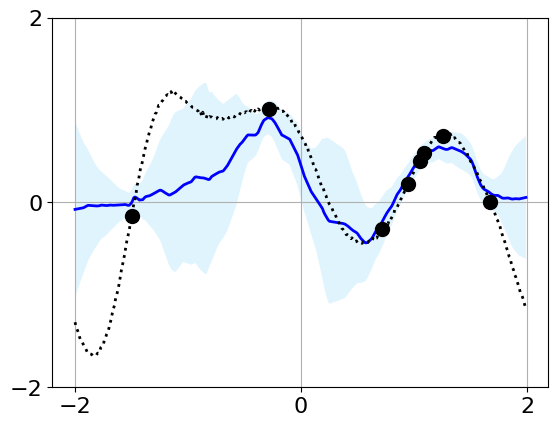

Training for 200000 epochs:  12%|█▏        | 24983/200000 [01:08<07:50, 372.37it/s]

Loss: 6.278063774108887


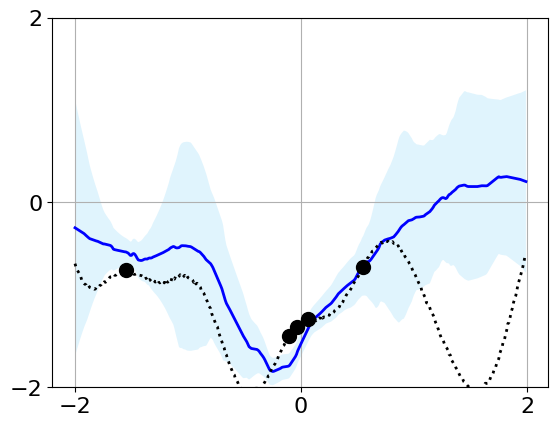

Training for 200000 epochs:  15%|█▍        | 29959/200000 [01:20<06:32, 432.70it/s]

Loss: -1.2984116077423096


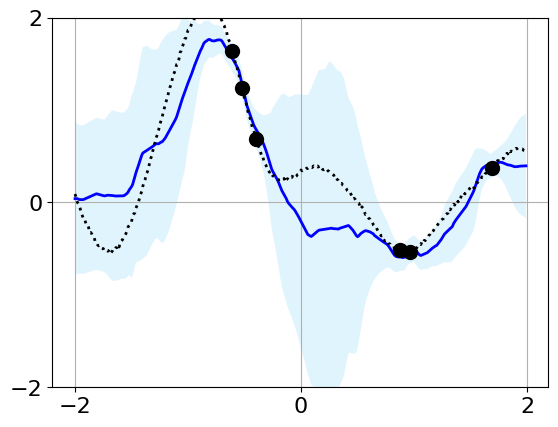

Training for 200000 epochs:  17%|█▋        | 34975/200000 [01:34<07:16, 377.66it/s]

Loss: -0.13251221179962158


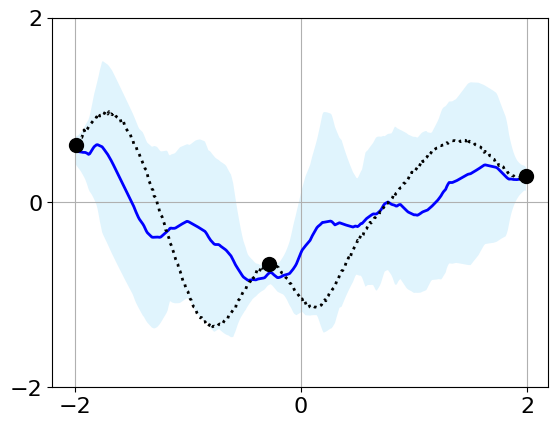

Training for 200000 epochs:  20%|█▉        | 39979/200000 [01:47<07:11, 371.03it/s]

Loss: 7.386239051818848


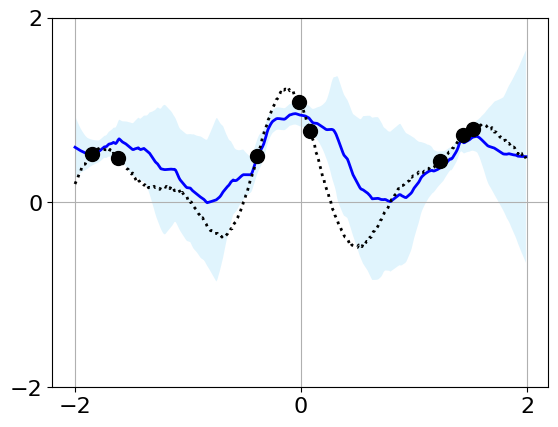

Training for 200000 epochs:  22%|██▏       | 44993/200000 [02:00<06:15, 413.35it/s]

Loss: 7.115124702453613


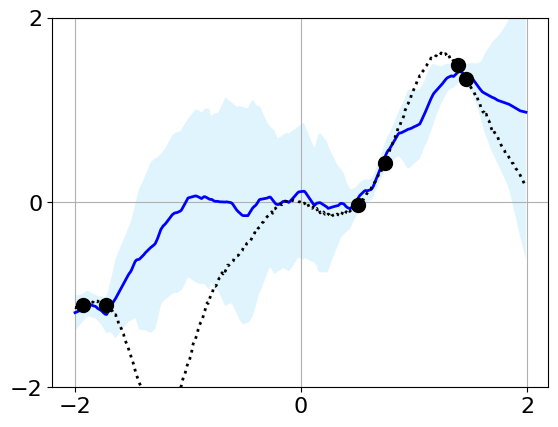

Training for 200000 epochs:  25%|██▍       | 49985/200000 [02:14<05:53, 423.95it/s]

Loss: -0.12115609645843506


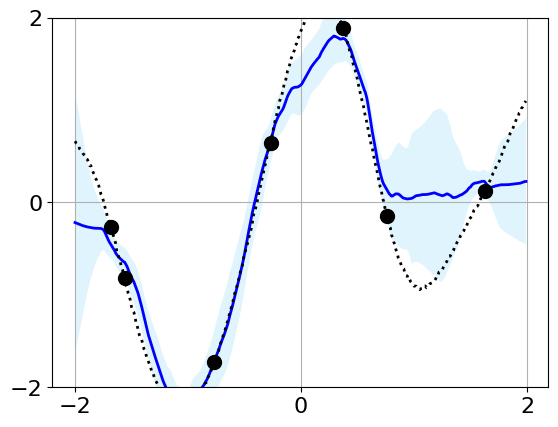

Training for 200000 epochs:  27%|██▋       | 54961/200000 [02:29<06:52, 351.47it/s]

Loss: -2.5024020671844482


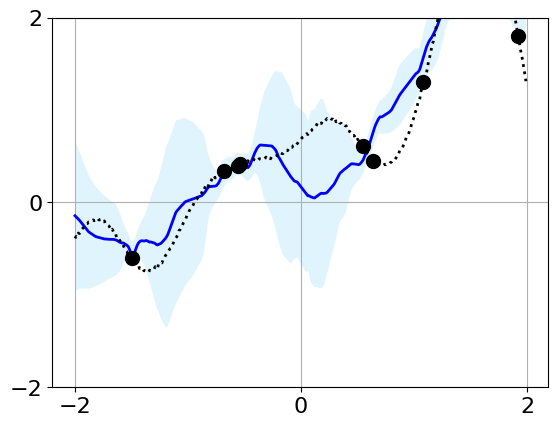

Training for 200000 epochs:  30%|██▉       | 59980/200000 [02:41<05:31, 422.44it/s]

Loss: -4.712174892425537


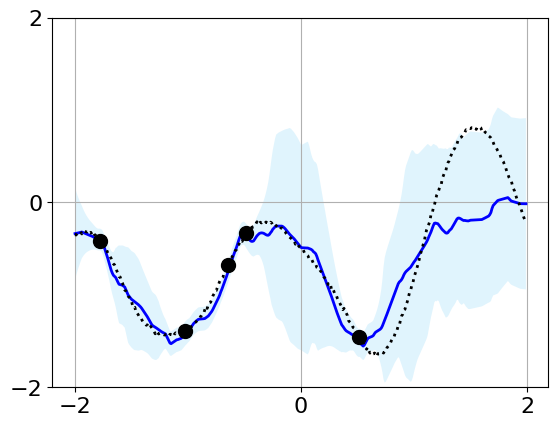

Training for 200000 epochs:  32%|███▏      | 64961/200000 [02:54<05:14, 429.40it/s]

Loss: -2.137758493423462


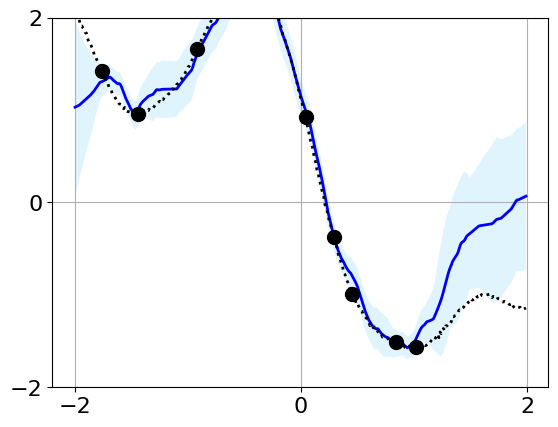

Training for 200000 epochs:  35%|███▍      | 69984/200000 [03:09<06:28, 334.99it/s]

Loss: -1.6010109186172485


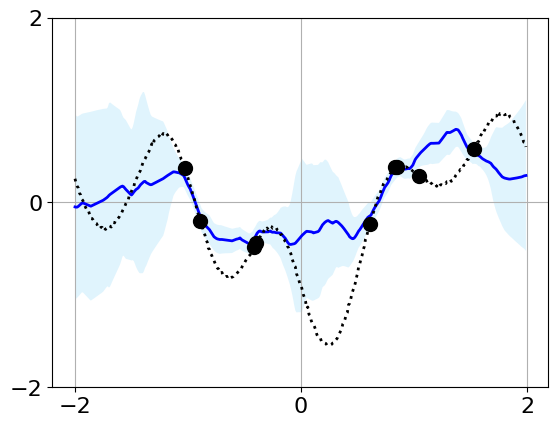

Training for 200000 epochs:  37%|███▋      | 74983/200000 [03:22<05:41, 365.86it/s]

Loss: 7.104575157165527


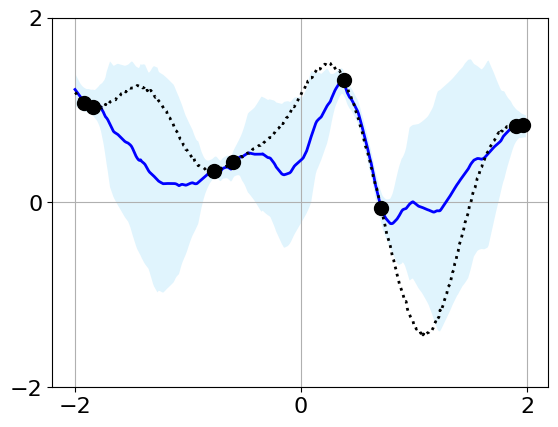

Training for 200000 epochs:  40%|███▉      | 79974/200000 [03:36<04:55, 406.23it/s]

Loss: -3.8349030017852783


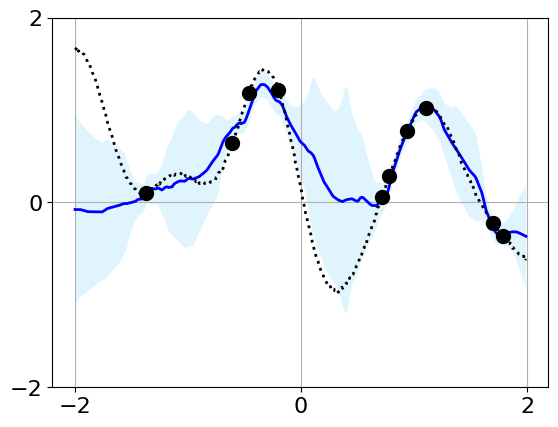

Training for 200000 epochs:  42%|████▏     | 84968/200000 [03:49<04:36, 416.16it/s]

Loss: -3.189706802368164


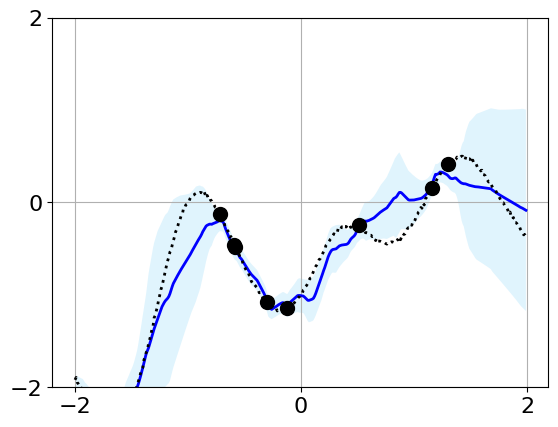

Training for 200000 epochs:  45%|████▍     | 89984/200000 [04:03<04:52, 376.16it/s]

Loss: -3.6442933082580566


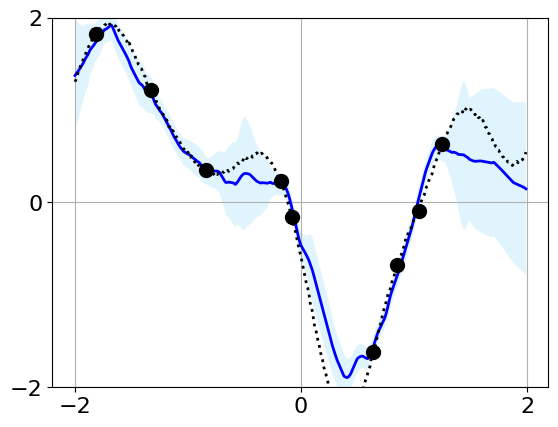

Training for 200000 epochs:  47%|████▋     | 94992/200000 [04:16<04:05, 427.75it/s]

Loss: -6.442963600158691


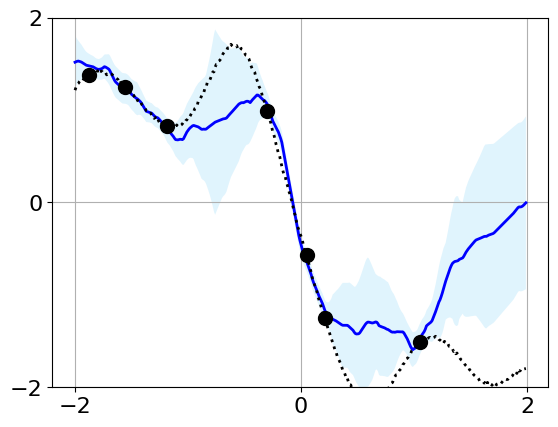

Training for 200000 epochs:  50%|████▉     | 99968/200000 [04:29<04:23, 379.02it/s]

Loss: -5.780570030212402


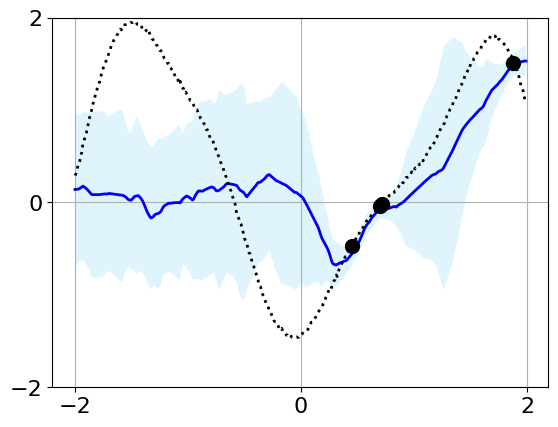

Training for 200000 epochs:  52%|█████▏    | 104992/200000 [04:42<04:48, 329.79it/s]

Loss: -6.494671821594238


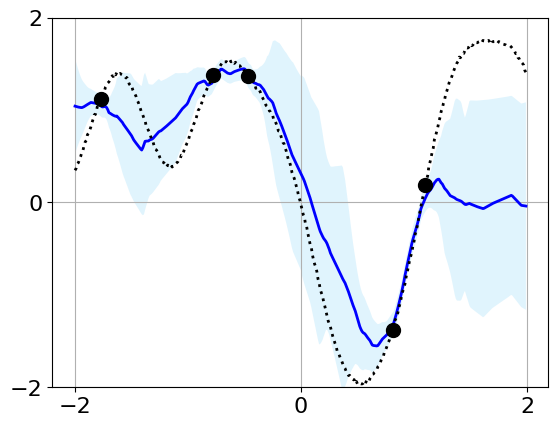

Training for 200000 epochs:  55%|█████▍    | 109992/200000 [04:55<03:51, 388.66it/s]

Loss: -5.714478969573975


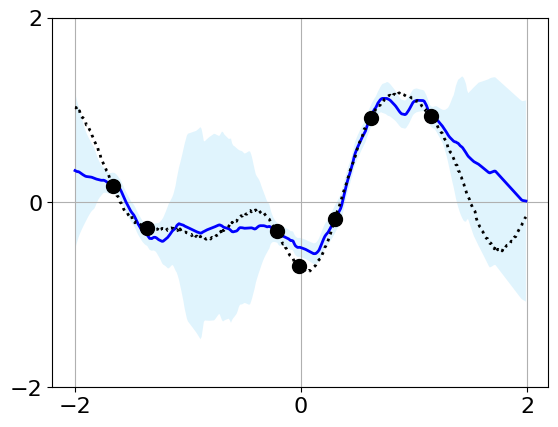

Training for 200000 epochs:  57%|█████▋    | 114986/200000 [05:08<03:19, 425.45it/s]

Loss: -2.2920756340026855


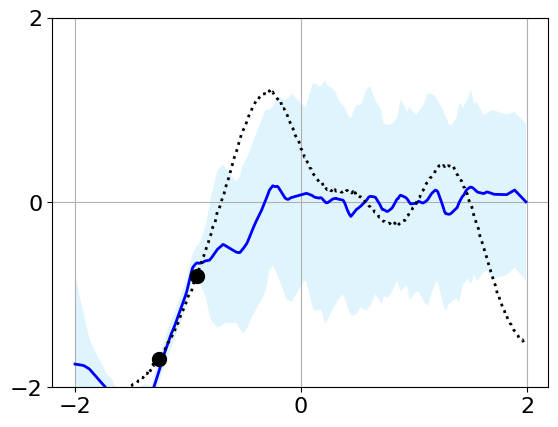

Training for 200000 epochs:  60%|█████▉    | 119967/200000 [05:22<03:31, 378.22it/s]

Loss: 3.7804622650146484


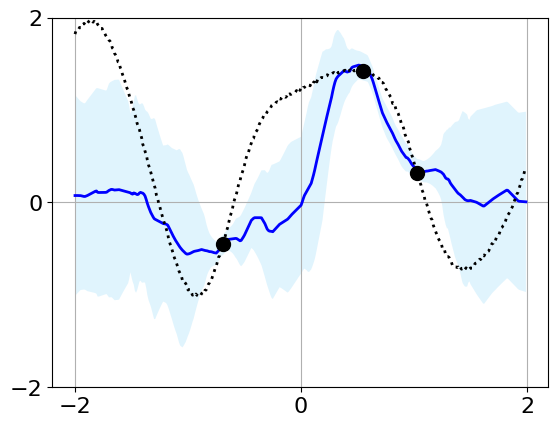

Training for 200000 epochs:  62%|██████▏   | 124987/200000 [05:34<03:35, 348.74it/s]

Loss: 6.62290096282959


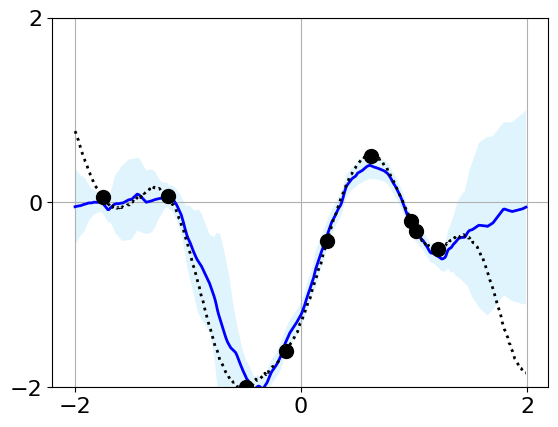

Training for 200000 epochs:  65%|██████▍   | 129996/200000 [05:49<03:20, 348.79it/s]

Loss: -0.24644410610198975


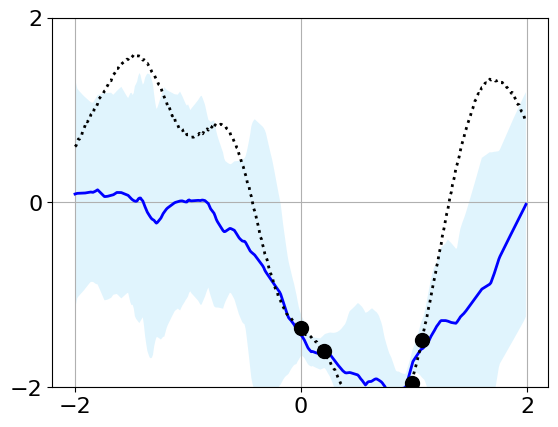

Training for 200000 epochs:  67%|██████▋   | 134966/200000 [06:02<02:54, 373.38it/s]

Loss: -1.8943493366241455


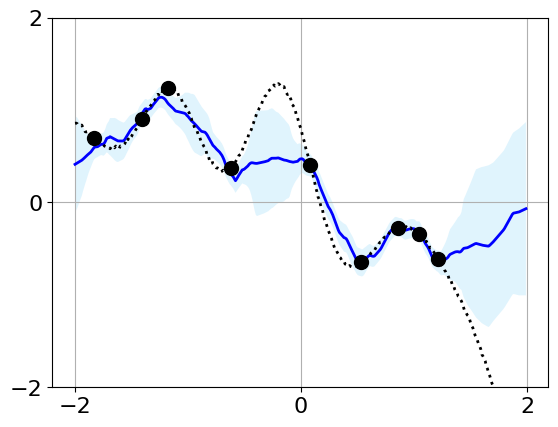

Training for 200000 epochs:  70%|██████▉   | 139989/200000 [06:16<02:43, 367.15it/s]

Loss: -3.830188274383545


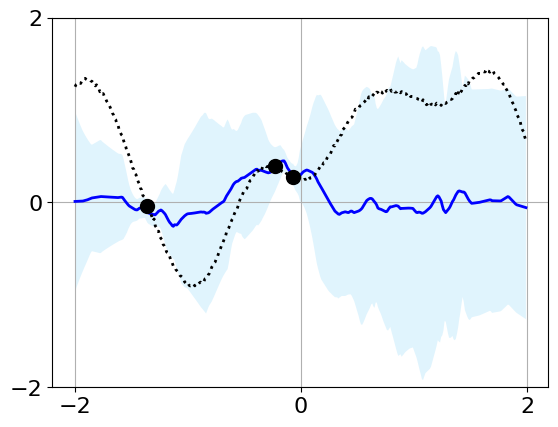

Training for 200000 epochs:  72%|███████▏  | 144985/200000 [06:30<02:28, 371.44it/s]

Loss: -5.678008556365967


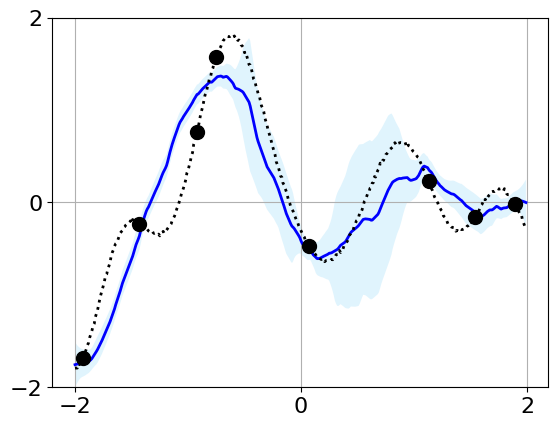

Training for 200000 epochs:  75%|███████▍  | 149990/200000 [06:43<01:56, 427.78it/s]

Loss: 1.041736364364624


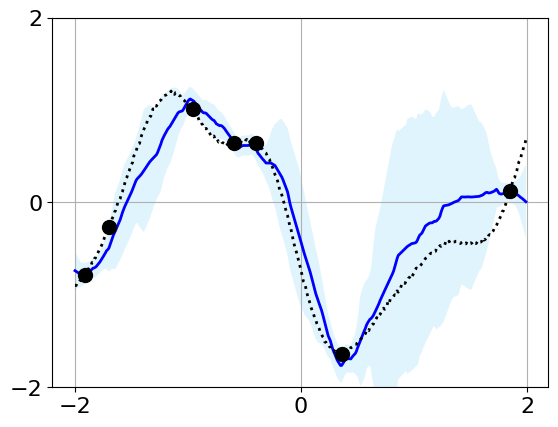

Training for 200000 epochs:  77%|███████▋  | 154989/200000 [06:56<01:44, 429.98it/s]

Loss: -2.4886634349823


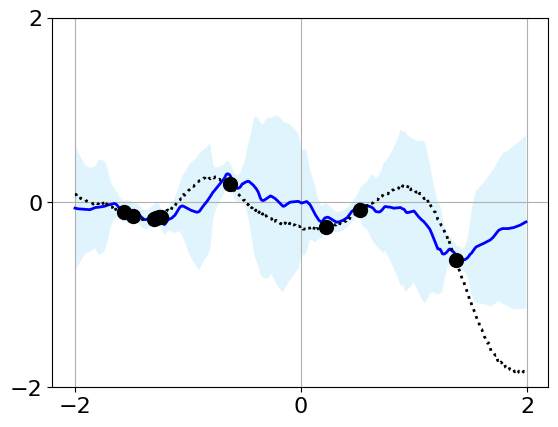

Training for 200000 epochs:  80%|███████▉  | 159986/200000 [07:09<01:50, 362.49it/s]

Loss: 1.6270029544830322


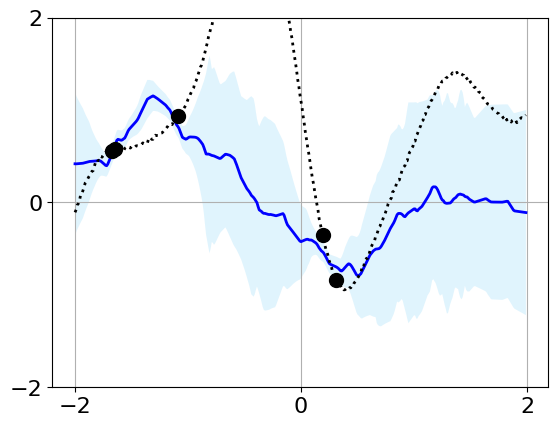

Training for 200000 epochs:  82%|████████▏ | 164971/200000 [07:22<01:23, 420.40it/s]

Loss: 2.5100367069244385


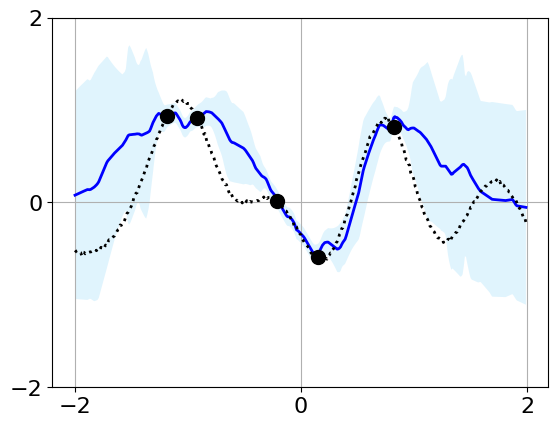

Training for 200000 epochs:  85%|████████▍ | 169996/200000 [07:35<01:20, 373.09it/s]

Loss: 1.4746527671813965


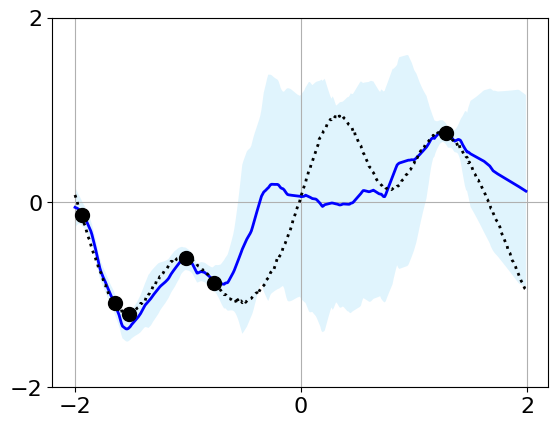

Training for 200000 epochs:  87%|████████▋ | 174973/200000 [07:47<00:58, 426.89it/s]

Loss: -1.9502637386322021


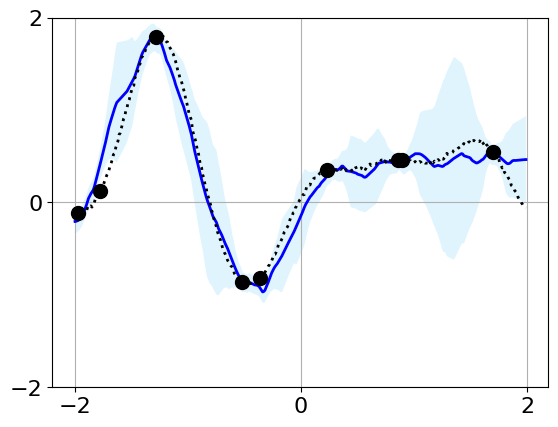

Training for 200000 epochs:  90%|████████▉ | 179998/200000 [07:59<00:47, 422.66it/s]

Loss: -5.383605480194092


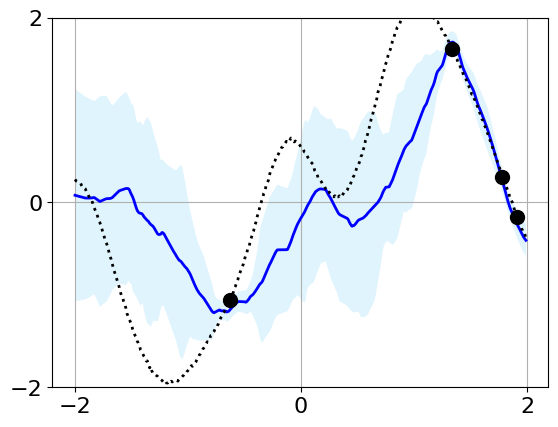

Training for 200000 epochs:  92%|█████████▏| 184982/200000 [08:13<00:40, 374.12it/s]

Loss: -6.734787940979004


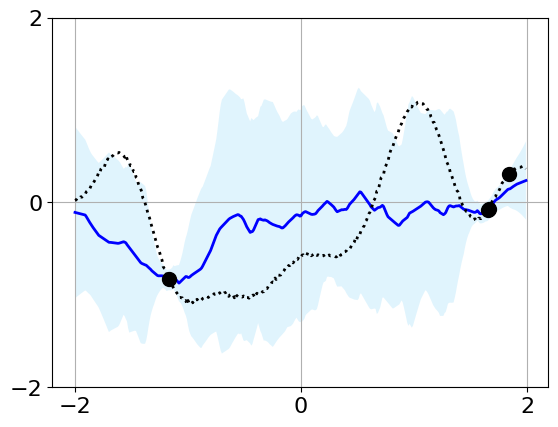

Training for 200000 epochs:  95%|█████████▍| 189967/200000 [08:26<00:26, 371.69it/s]

Loss: 0.7472568154335022


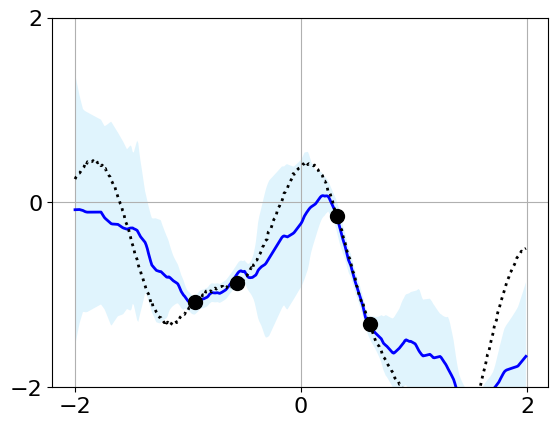

Training for 200000 epochs:  97%|█████████▋| 194978/200000 [08:39<00:13, 364.69it/s]

Loss: -4.346616744995117


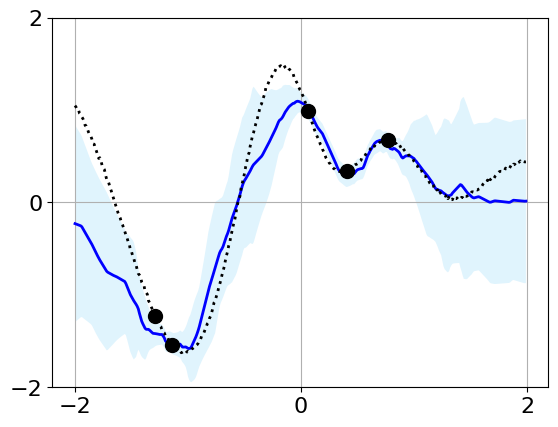

Training for 200000 epochs: 100%|█████████▉| 199974/200000 [08:53<00:00, 365.48it/s]

Loss: -3.8211679458618164


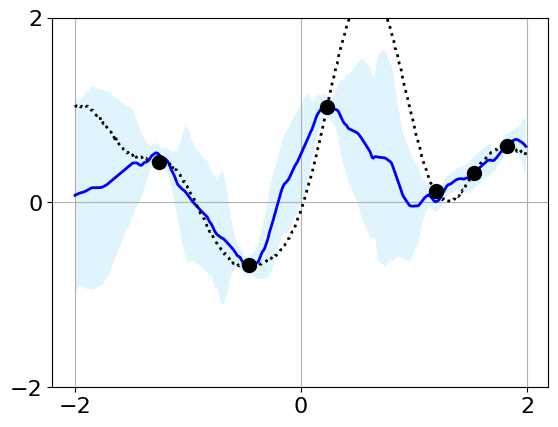

Training for 200000 epochs: 100%|██████████| 200000/200000 [08:53<00:00, 374.54it/s]


In [ ]:
deterministic_cnp = train(config=cfg, model=deterministic_cnp, data_train=data_train, data_test=data_test)